In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector
from sqlalchemy import create_engine, types
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="sound",
    database="eda_practice")

In [3]:
query ="select * from euromart_stores;"

In [4]:
df=pd.read_sql(query,conn)
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [5]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.5,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.5,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.5,17,-1,2,True


In [6]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of              Order ID  Order Date     Customer Name         Country  \
0     BN-2011-7407039  2011-01-01        Ruby Patel          Sweden   
1     AZ-2011-9050313  2011-01-03    Summer Hayward  United Kingdom   
2     AZ-2011-6674300  2011-01-04  Devin Huddleston          France   
3     BN-2011-2819714  2011-01-04       Mary Parker  United Kingdom   
4     BN-2011-2819714  2011-01-04       Mary Parker  United Kingdom   
...               ...         ...               ...             ...   
8042   AZ-2014-766953  2014-12-31      Jose Gambino  United Kingdom   
8043  BN-2014-4140795  2014-12-31   Daniel Hamilton     Netherlands   
8044  BN-2014-4140795  2014-12-31   Daniel Hamilton     Netherlands   
8045  BN-2014-4140795  2014-12-31   Daniel Hamilton     Netherlands   
8046   AZ-2014-766953  2014-12-31      Jose Gambino  United Kingdom   

                      State        City   Region      Segment     Ship Mode  \
0                 Stockholm   Stockh

In [8]:
df.shape

(8047, 17)

Finding the missing values

In [9]:
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
Country          0
State            0
City             0
Region           0
Segment          0
Ship Mode        0
Category         0
Sub-Category     0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Feedback?        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(2)

Feature engineering

Feature engineering refers to the process of using domain knowledge to select and transform  the most relevant variables from raw data wwhen creating a predictive model using machine learning or statistcal modelling. the main goal of feature engneering is to create  meaningful data from the raw data.

Creating Features

we will play around with the variales order date in our dataset. if we see the sample data, the columns 'order date' show the sale date

it would be difficult to find the year, monthwise sales and profit.

introducing a new columns , year, month to know the sales nd profit distribution on various datetime.

In [11]:
df['Year']=pd.DatetimeIndex(df['Order Date']).year
df['Month']=pd.DatetimeIndex(df['Order Date']).month

In [12]:
df['Discount'] =df['Discount']*100
df['Discount'] =df['Discount'].astype('int')


In [13]:
df['Total_Sales'] =df['Sales']*df['Quantity']
df['Total_Profit'] =df['Profit']*df['Quantity']


In [14]:
df.head(1)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Total_Sales,Total_Profit
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,"Enermax Note Cards, Premium",50,45,-26,3,False,2011,1,135,-78


In [15]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [16]:
def quarter(month):
    if month in [1,2,3]:
        return "Quarter 1"
    elif month in [4,5,6]:
        return "Quarter 2"
    elif month in [7,8,9]:
        return "Quarter 3"
    else:
        return "Quarter 4"
    
df['Quarters'] = df['Month'].apply(quarter)   

In [17]:
df['Quarters'].unique()

array(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], dtype=object)

Removing unnecessary columns

In [18]:
df.drop(columns=['Order ID', 'Order Date'],axis=1, inplace=True)

In [19]:
df.head(1)

,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Year,Month,Total_Sales,Total_Profit,Quarters
0,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50,45,-26,3,False,2011,1,135,-78,Quarter 1


In [20]:
df.shape

(8047, 20)

EDA Exploratory Data Analysis

Exploratory Data Analysis refers to the crucil process of performing initial investigations on data to discover pattterns to check assumptions with the help of summary statistics and graphical representation.


STATISTICS SUMMARRY

the information gives a quick and simple description of the data..
 

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount,8047.0,11.004722,18.177262,0.0,0.0,0.0,10.0,85.0
Sales,8047.0,291.845657,485.212156,3.0,48.0,117.0,313.0,6517.0
Profit,8047.0,35.198211,178.125844,-3060.0,1.0,14.0,47.0,2476.0
Quantity,8047.0,3.772089,2.203369,1.0,2.0,3.0,5.0,14.0
Year,8047.0,2012.728843,1.100264,2011.0,2012.0,2013.0,2014.0,2014.0
Month,8047.0,7.365229,3.321485,1.0,5.0,8.0,10.0,12.0
Total_Sales,8047.0,1478.685597,3725.809433,3.0,127.5,413.0,1273.0,80206.0
Total_Profit,8047.0,171.491736,1325.429134,-36720.0,1.0,40.0,181.0,29712.0


In [22]:
df.describe(include='object').T

,count,unique,top,freq
Customer Name,8047,792,Joel Peters,32
Country,8047,15,France,1916
State,8047,127,England,1187
City,8047,999,London,219
Region,8047,3,Central,4426
Segment,8047,3,Consumer,4174
Ship Mode,8047,4,Economy,4862
Category,8047,3,Office Supplies,5286
Sub-Category,8047,17,Art,1152
Product Name,8047,1810,"Eldon File Cart, Single Width",26


In [23]:
cat = df.select_dtypes(exclude=['int','float']).columns
num = df.select_dtypes(include=['int','float']).columns.tolist()
print(cat)
print(num)

Index(['Customer Name', 'Country', 'State', 'City', 'Region', 'Segment',
       'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Feedback?',
       'Quarters'],
      dtype='object')
['Discount', 'Sales', 'Profit', 'Quantity', 'Year', 'Month', 'Total_Sales', 'Total_Profit']


Univariate Anaalysis

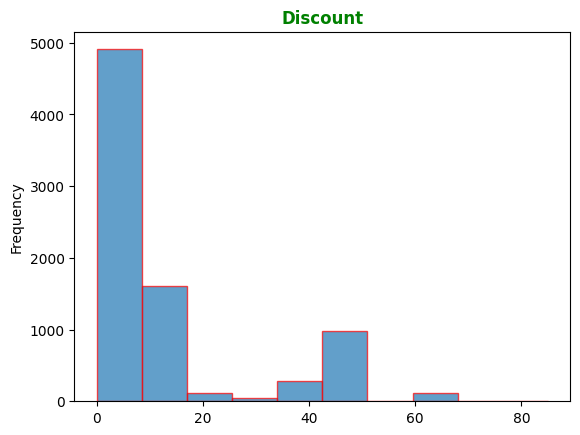

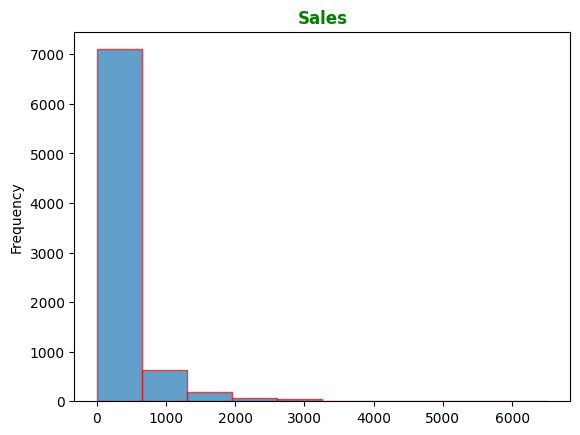

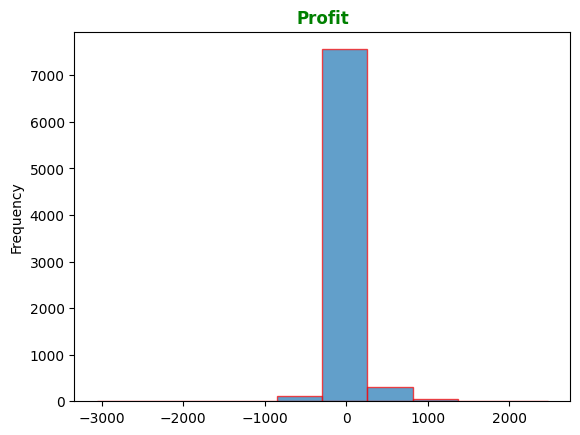

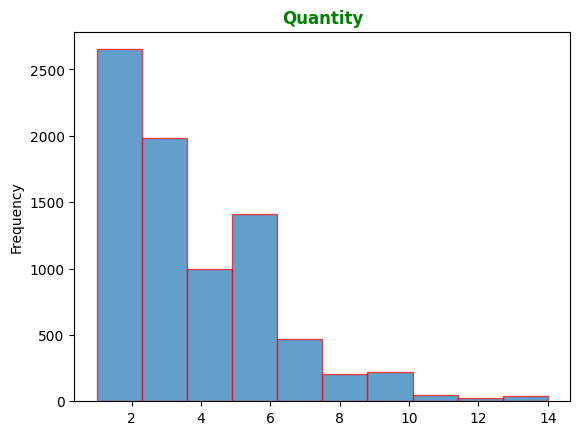

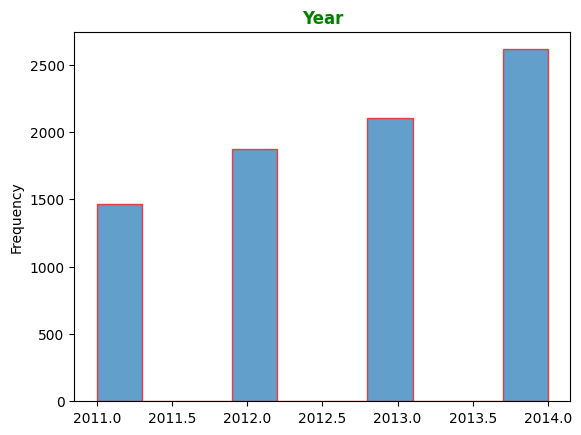

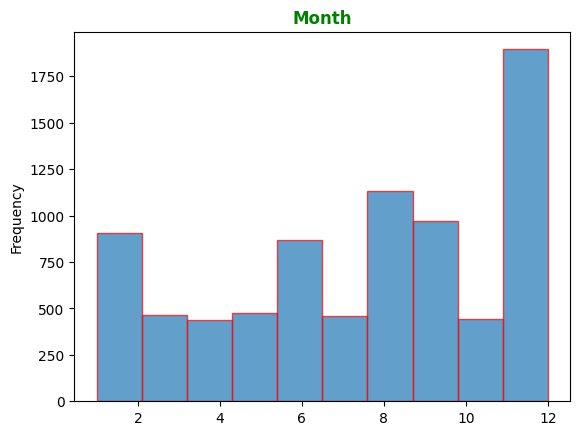

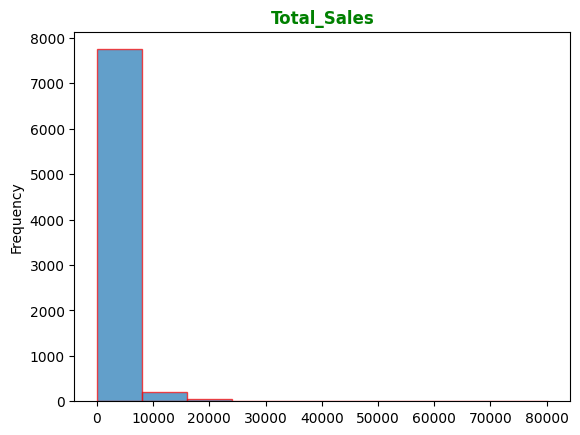

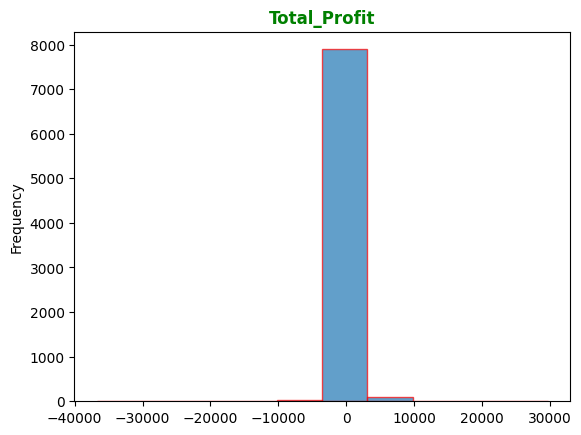

In [24]:
for col in num:
    
    plt.figure()
    plt.hist(df[col], bins=10, alpha=0.7, edgecolor='red')
    plt.ylabel('Frequency')
    plt.title(col, fontsize=12, fontweight='bold', color='green')
    
    plt.show()

In [25]:
cat=['Customer Name','Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category','Sub-Category', 'Product Name','Feedback?', 'Month','Quarters']

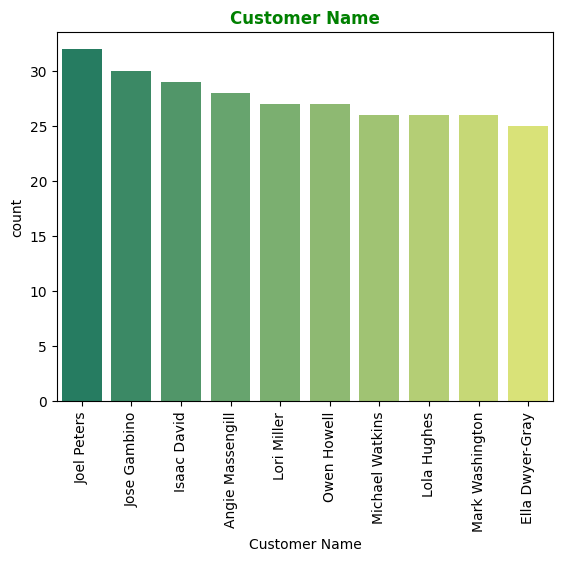

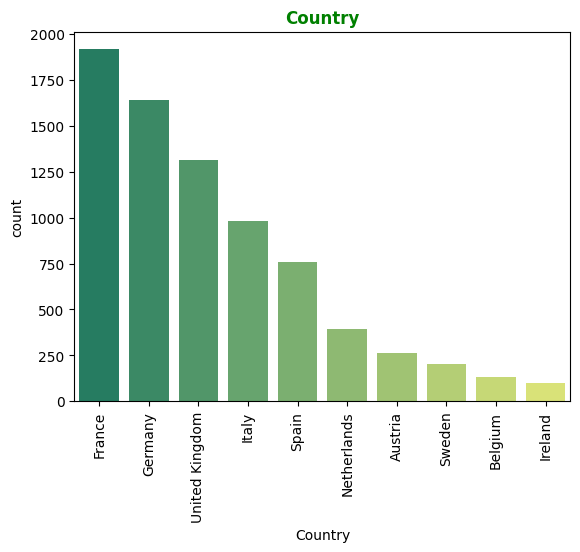

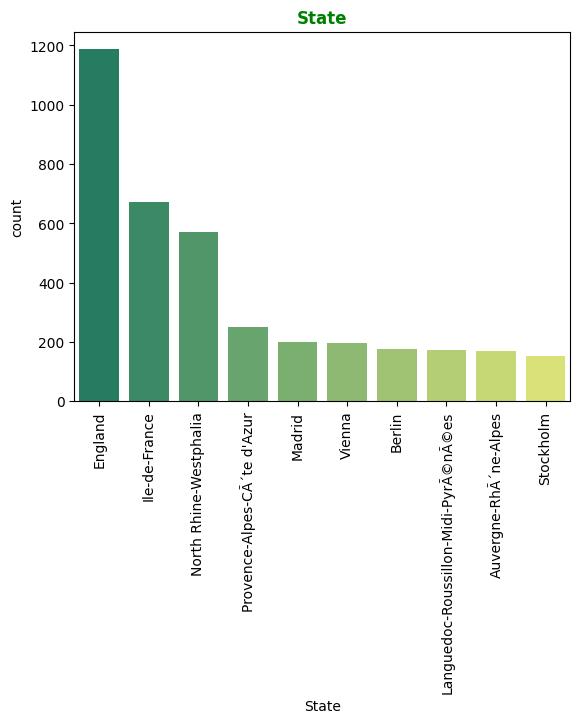

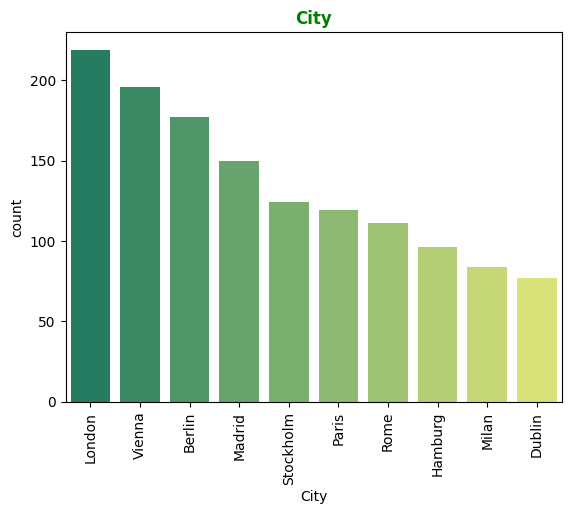

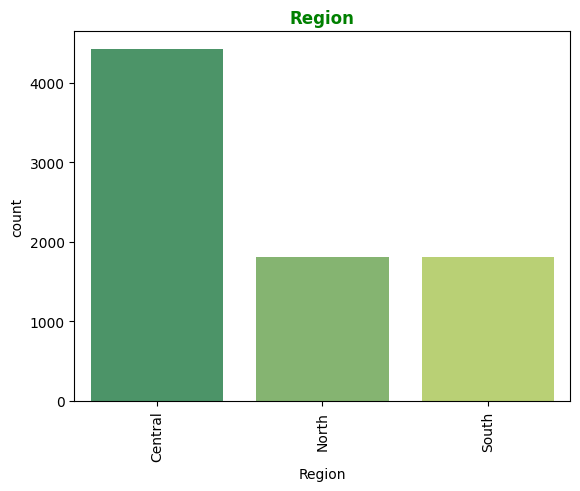

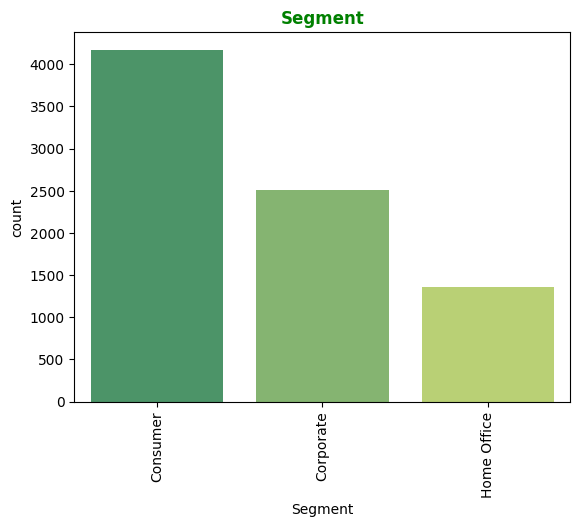

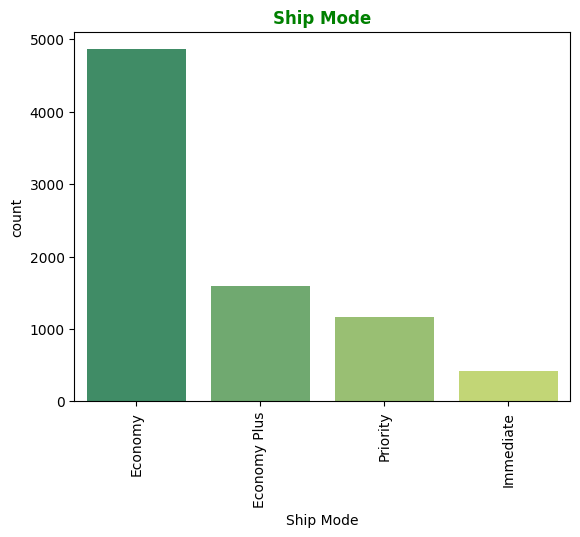

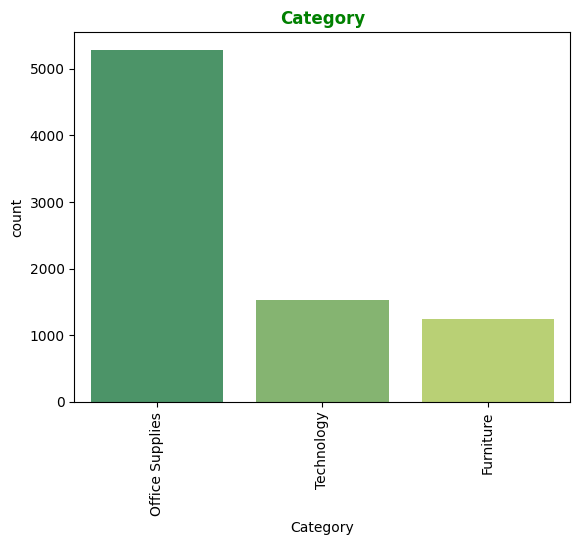

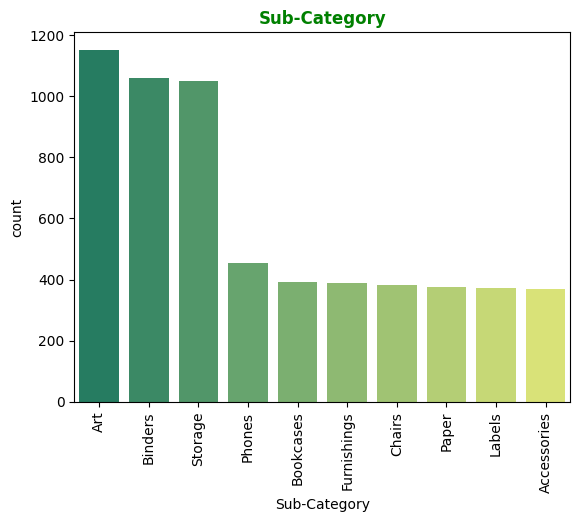

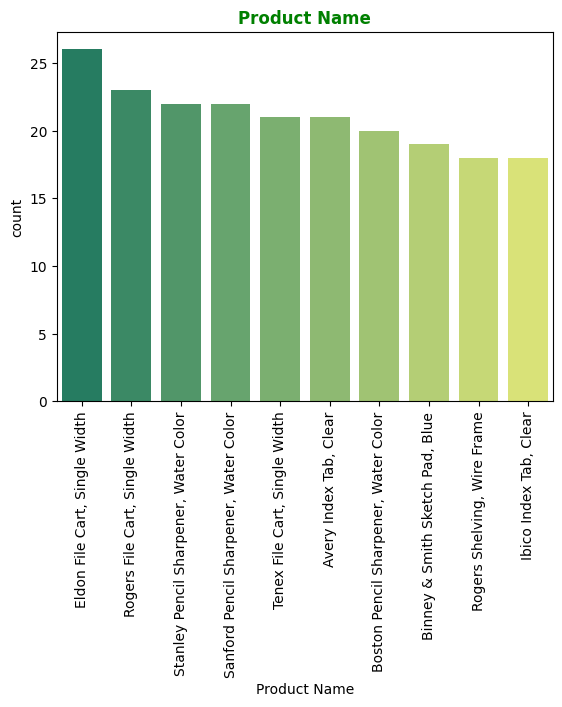

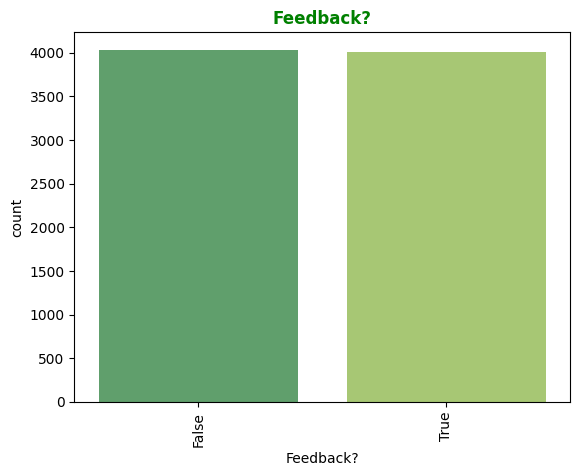

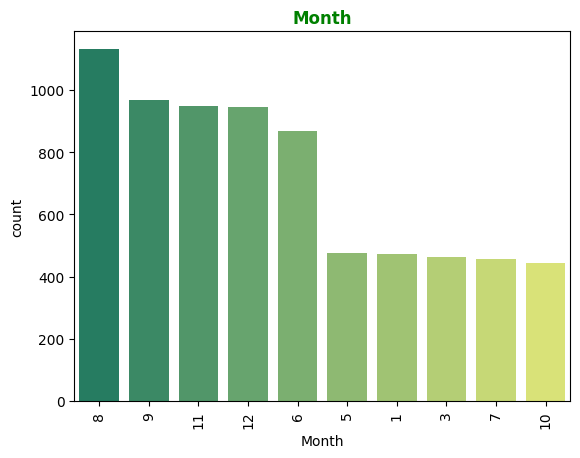

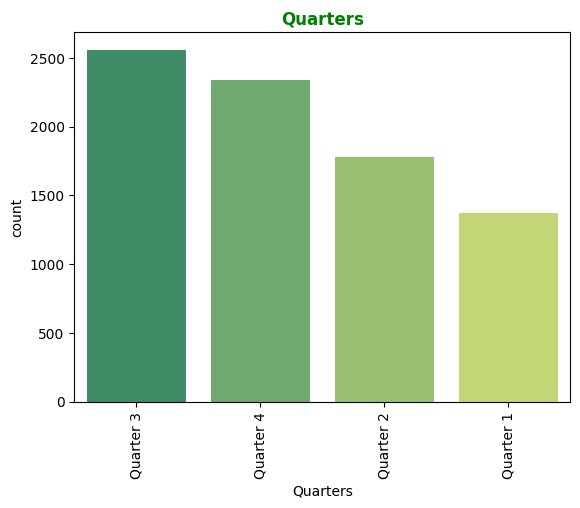

In [26]:
for col in cat:
    
    plt.figure()
    sns.countplot(x=col, data=df,order=df[col].value_counts().head(10).index, palette='summer')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=12, fontweight='bold', color='green')
    
    plt.show()

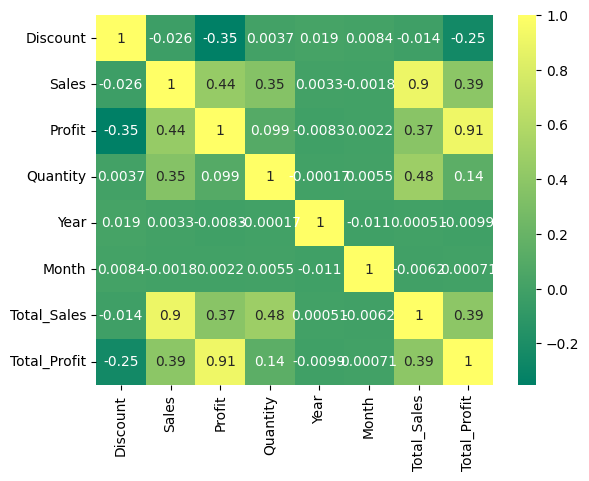

In [27]:
corr=df[num].corr('pearson')
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

finding the insight

In [28]:
#set the display format for flaoting point numbers
pd.options.display.float_format='{:,.2f}'.format

Net sales

In [29]:

print(f'Net Sales {df['Sales'].sum()}')

Net Sales 2348482


Net Profit

In [30]:
print(f'Net Profit {df['Profit'].sum()}')

Net Profit 283240


In [31]:
print(f'Gross Sales {df['Total_Sales'].sum()}')

Gross Sales 11898983


In [32]:
print(f'Gross Sales {df['Total_Profit'].sum()}')

Gross Sales 1379994


PROFIT MARGINE

In [33]:
print(f'Profit Margin {round(df['Total_Profit'].sum()/df['Total_Sales'].sum()*100)}%')

Profit Margin 12%


WHICH YEAR AND MONTH CONTRIBUTE THE MOST TO SALES AND PROFIT

In [34]:
#group data by month and calculate sum
year_analysis= df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Sales', ascending=False)

In [35]:
pip install Jinja2

In [36]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [37]:
year_analysis.style.background_gradient(cmap='Blues')

,Year,Sales,Profit,Quantity
3,2014,755030,85330,9833
2,2013,630224,77200,7938
1,2012,548880,66223,7099
0,2011,414348,54487,5484


In [38]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

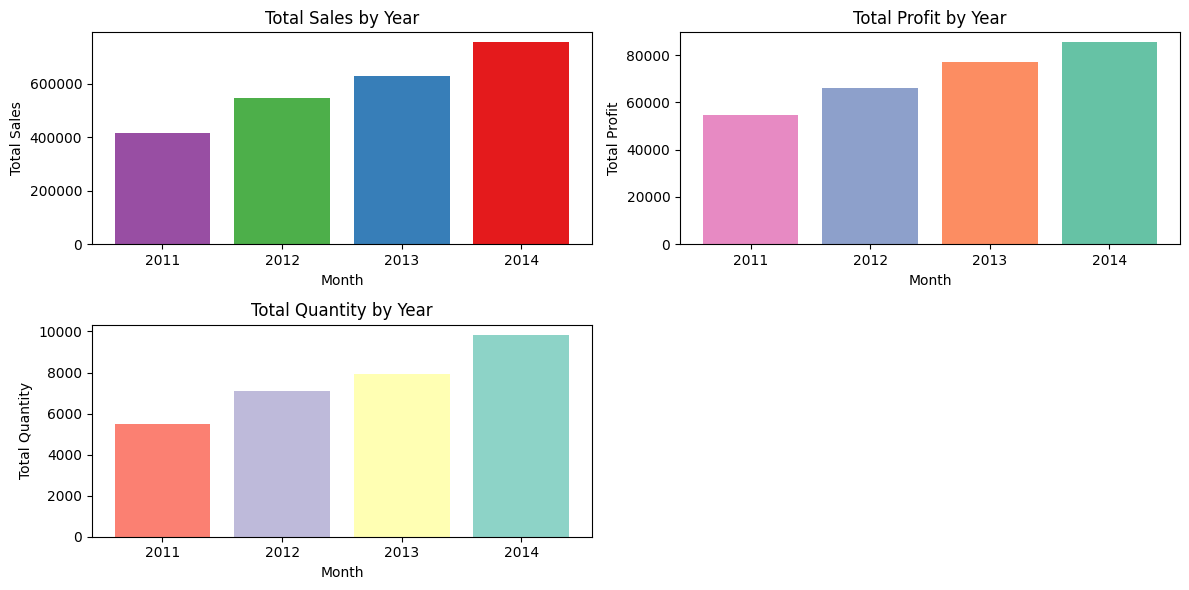

In [39]:
#plotting
plt.figure(figsize=(12,6))

#sales plot
plt.subplot(2,2,1)
plt.bar(year_analysis['Year'],year_analysis['Sales'],color=sns.color_palette('Set1'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

#Profit plot
plt.subplot(2,2,2)
plt.bar(year_analysis['Year'],year_analysis['Profit'],color=sns.color_palette('Set2'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')

#Quantity plot
plt.subplot(2,2,3)
plt.bar(year_analysis['Year'],year_analysis['Quantity'],color=sns.color_palette('Set3'))
plt.xticks([2011, 2012, 2013, 2014])
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.title('Total Quantity by Year')

plt.tight_layout()
plt.show()



In [40]:
#group data by month and calculate sum
monthly_data= df.groupby('Month').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [41]:
monthly_data.style.background_gradient(cmap='Greens')

,Month,Sales,Profit,Quantity
0,Aug,303126,38486,4210
1,Sep,295289,37423,3695
2,Nov,277239,28533,3687
3,Dec,272751,34103,3556
4,Jun,271828,31797,3294
5,Jul,146159,16694,1695
6,May,142461,16171,1778
7,Jan,139157,17507,1753
8,Api,132051,16004,1686
9,Feb,123685,14482,1618


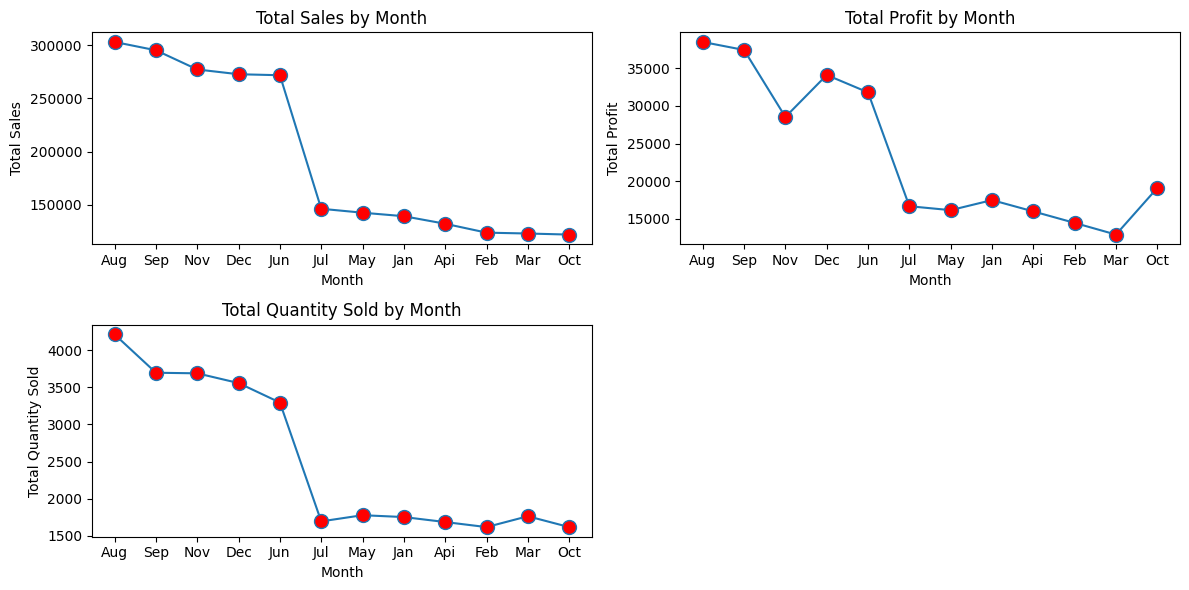

In [42]:
# Plotting
plt.figure(figsize=(12, 6))

# Sales plot
plt.subplot(2, 2, 1)
plt.plot(monthly_data['Month'], monthly_data['Sales'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.plot(monthly_data['Month'], monthly_data['Profit'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Profit by Month')
plt.xlabel('Month')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.plot(monthly_data['Month'], monthly_data['Quantity'], marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Quantity Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()



In [43]:
Quarter_data= df.groupby('Quarters').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [44]:
Quarter_data.style.background_gradient(cmap='Greens')

,Quarters,Sales,Profit,Quantity
0,Quarter 3,744574,92603,9600
1,Quarter 4,671851,81746,8861
2,Quarter 2,546340,63972,6758
3,Quarter 1,385717,44919,5135


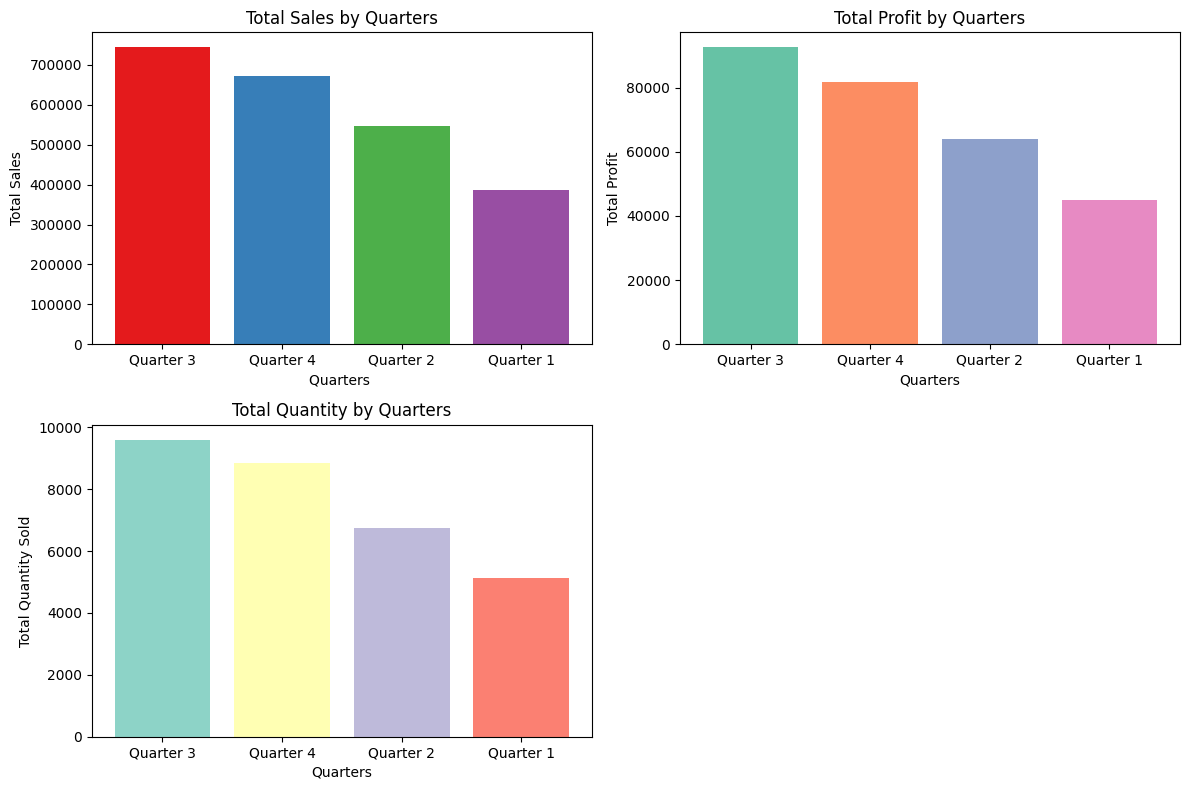

In [45]:
# Plotting
plt.figure(figsize=(12, 8))


# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Quarter_data['Quarters'], Quarter_data['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Quarters')
plt.xlabel('Quarters ')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Quarter_data['Quarters'], Quarter_data['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Quarter_data['Quarters'], Quarter_data['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Quarters')
plt.xlabel('Quarters')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [46]:
Ship_Mode_analysis= df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).reset_index()

In [47]:
Ship_Mode_analysis.sort_values(by='Sales',ascending=False).style.background_gradient(cmap='BrBG')

,Ship Mode,Sales,Profit,Quantity
0,Economy,1412777,178696,18390
1,Economy Plus,483965,54336,6000
3,Priority,320426,32639,4405
2,Immediate,131314,17569,1559


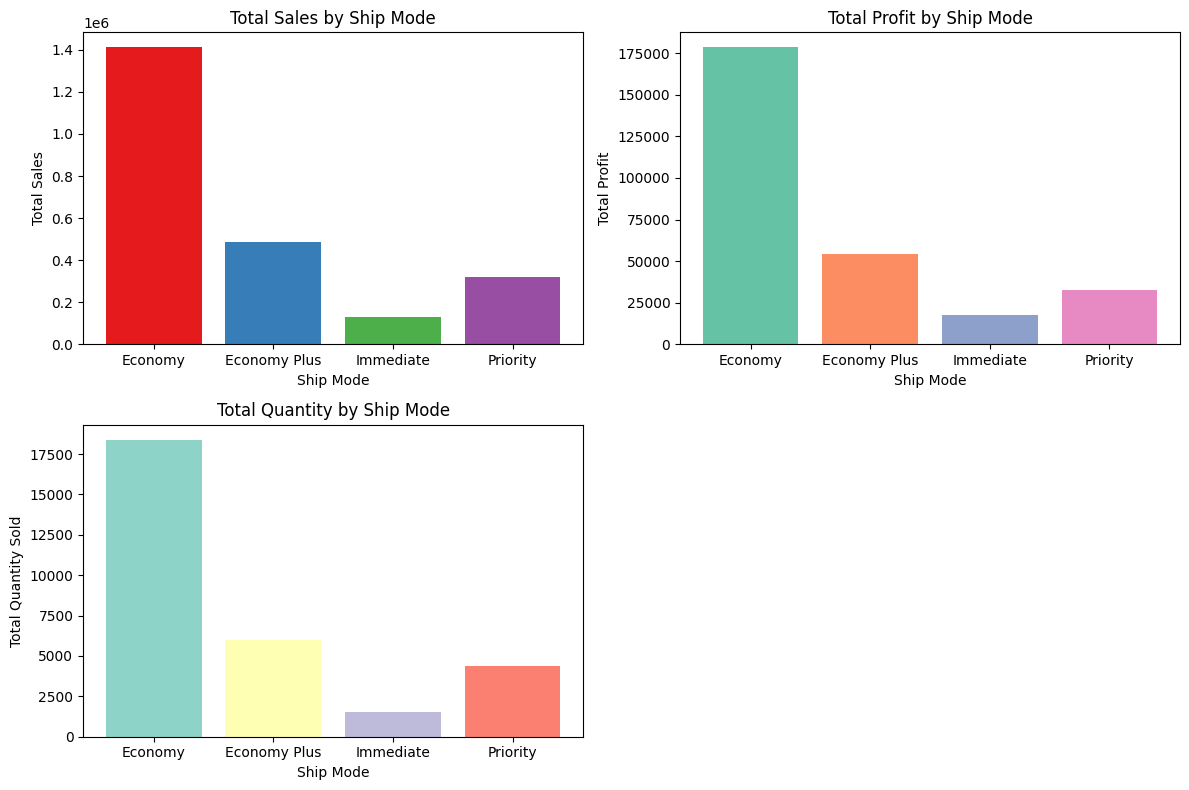

In [48]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Ship_Mode_analysis['Ship Mode'], Ship_Mode_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()

In [49]:
Segment_analysis= df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
}).sort_values(by='Sales', ascending=False).reset_index()

In [50]:
Segment_analysis.sort_values(by='Sales',ascending=False).style.background_gradient(cmap='BrBG')

,Segment,Sales,Profit,Quantity
0,Consumer,1236282,147447,15716
1,Corporate,738137,92634,9498
2,Home Office,374063,43159,5140


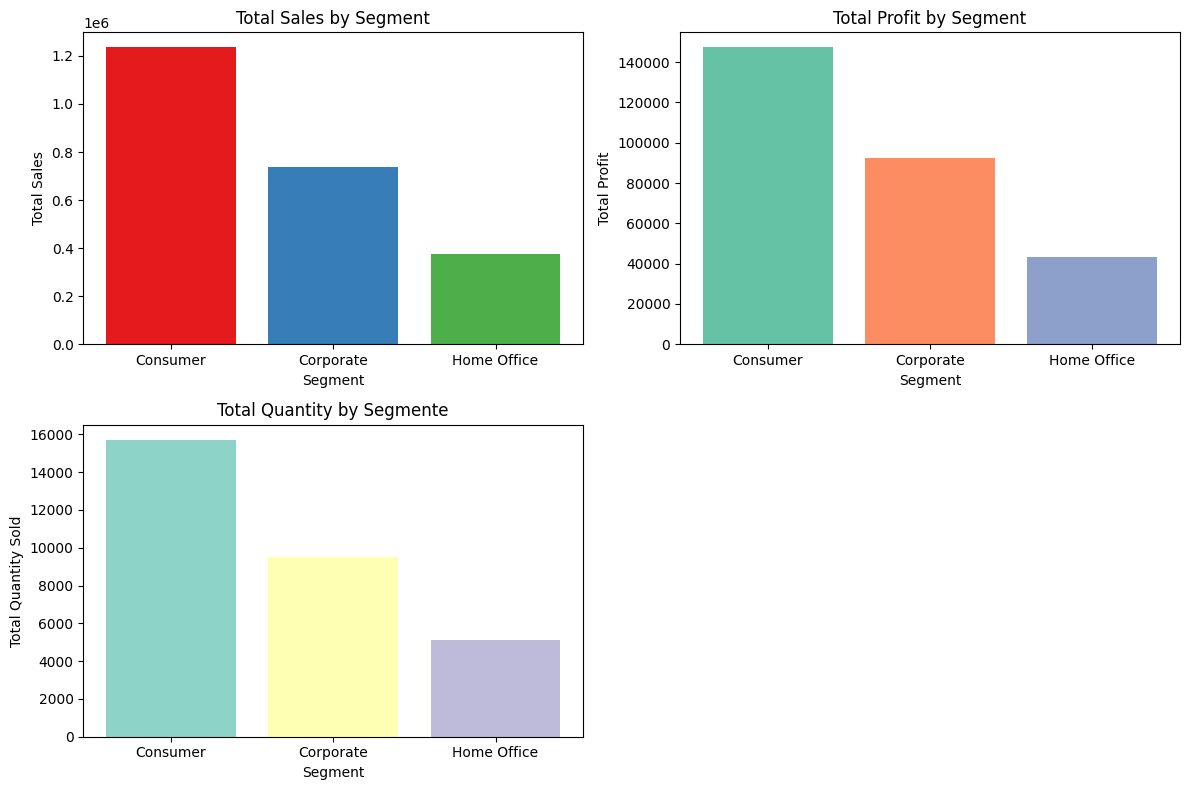

In [51]:
# Plotting
plt.figure(figsize=(12, 8))

# Sales plot
plt.subplot(2, 2, 1)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Sales'], color=sns.color_palette('Set1'))
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

# Profit plot
plt.subplot(2, 2, 2)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Profit'], color=sns.color_palette('Set2'))
plt.title('Total Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

# Quantity plot
plt.subplot(2, 2, 3)
plt.bar(Segment_analysis['Segment'], Segment_analysis['Quantity'], color=sns.color_palette('Set3'))
plt.title('Total Quantity by Segmente')
plt.xlabel('Segment')
plt.ylabel('Total Quantity Sold')

plt.tight_layout()
plt.show()